In [ ]:

!pip install scikit-learn
!pip install seaborn


In [12]:
import pandas as pd
import random

# Define the path for the CSV file
csv_path = 'simulation_dataset.csv'

In [13]:
# Define possible text fragments related to VTE
positive_fragments = [
    "Thrombus present",
    "Deep venous thrombosis present",
    "Few new pulmonary emboli",
    "Segmental and subsegmental pulmonary artery branches",
    "Central saddle pulmonary embolus",
    "Right-sided heart strain",
    "Right ventricular to left ventricular ratio is 0.8"
]

# Define possible text fragments not related to VTE
negative_fragments = [
    "No thrombus",
    "Decreased left pulmonary artery emboli",
    "The remaining lung parenchyma is unchanged",
    "No right-sided heart strain",
    "No central saddle pulmonary embolus"
]

# Initialize empty lists to hold notes and labels
notes = []
labels = []



In [14]:
# Generate 50 rows
for _ in range(50):
    note_fragments = []
    label = 0  # Assume negative by default

    # Randomly select fragments to form a note
    while True:
        fragment = random.choice(positive_fragments + negative_fragments)
        if len(", ".join(note_fragments) + fragment) + len("FINDINGS: ") < 100:
            note_fragments.append(fragment)
            if fragment in positive_fragments:
                label = 1
        else:
            break

    # Create the note
    note = "FINDINGS: " + ", ".join(note_fragments)

    # Append the generated note and label to lists
    notes.append(note)
    labels.append(label)



In [15]:
# Create a DataFrame
df = pd.DataFrame({
    'Notes': notes,
    'VTE_Label': labels
})



In [3]:
# Write the DataFrame to a CSV file
# df.to_csv(csv_path, index=False)

NameError: name 'df' is not defined

In [16]:
df.Notes.values

array(['FINDINGS: Right-sided heart strain, Segmental and subsegmental pulmonary artery branches, No thrombus',
       'FINDINGS: Right-sided heart strain, Few new pulmonary emboli, No central saddle pulmonary embolus',
       'FINDINGS: Right-sided heart strain, No central saddle pulmonary embolus, Thrombus present',
       'FINDINGS: Deep venous thrombosis present, Few new pulmonary emboli',
       'FINDINGS: No right-sided heart strain, Deep venous thrombosis present',
       'FINDINGS: Deep venous thrombosis present, Right-sided heart strain',
       'FINDINGS: No central saddle pulmonary embolus, Right-sided heart strain',
       'FINDINGS: The remaining lung parenchyma is unchanged, Few new pulmonary emboli',
       'FINDINGS: Segmental and subsegmental pulmonary artery branches, No right-sided heart strain',
       'FINDINGS: Right-sided heart strain, Right ventricular to left ventricular ratio is 0.8',
       'FINDINGS: Segmental and subsegmental pulmonary artery branches',
   

In [1]:
import pandas as pd

# Define the file path
file_path = "/Users/porwals/Documents/GitHub/python_packages/llmtag/tests/benchmark_data/out.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded
df.head()


,patient_id,notes,label,llm_label,llm_reasons
0,1,Patient complains of leg pain and swelling. Ul...,1.0,1,Ultrasound confirms DVT
1,2,Patient experiences chest pain and shortness o...,1.0,1,CT scan confirms PE
2,3,Patient has a history of DVT. No current sympt...,0.0,0,No Symptoms found
3,4,No complaints or symptoms related to VTE or PE.,0.0,0,No evidence of VTE or PE
4,6,Leg swelling and pain present. Ultrasound conf...,1.0,1,Ultrasound confirms DVT


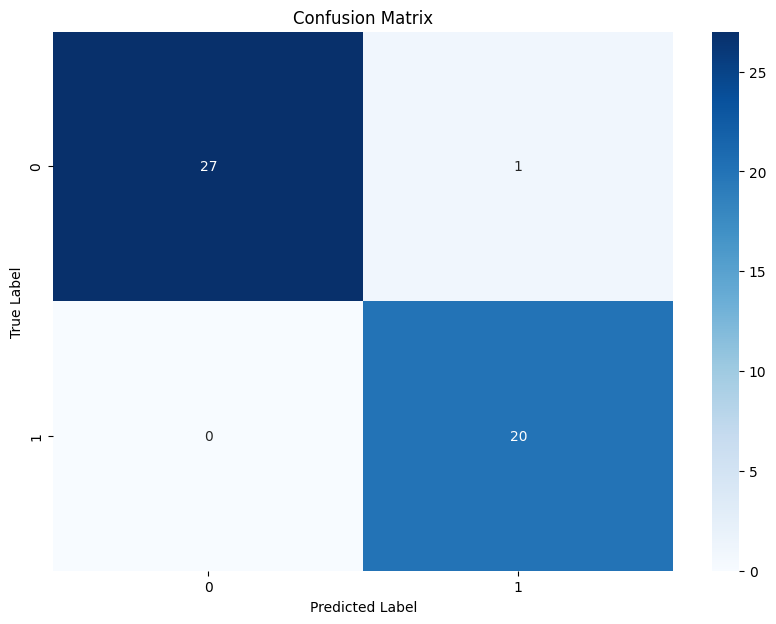

In [8]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the local file
file_path = "/Users/porwals/Documents/GitHub/python_packages/llmtag/tests/benchmark_data/out.csv"
df = pd.read_csv(file_path)

# Drop rows with NaN values in the 'label' or 'llm_label' columns
df = df.dropna(subset=['label', 'llm_label'])

# Extract the true labels and predicted labels
true_labels = df['label'].values
predicted_labels = df['llm_label'].values

# Compute the confusion matrix
matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


F1 Score: 0.9756
Precision: 0.9524
Recall: 1.0000
Accuracy: 0.9792


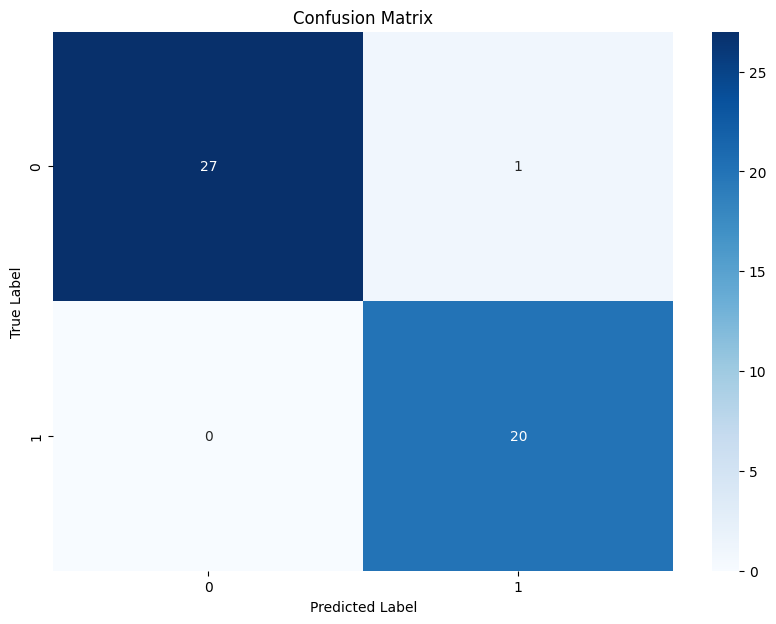

In [10]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# Load the data from the local file
file_path = "/Users/porwals/Documents/GitHub/python_packages/llmtag/tests/benchmark_data/out.csv"
df = pd.read_csv(file_path)

# Drop rows with NaN values in the 'label' or 'llm_label' columns
df = df.dropna(subset=['label', 'llm_label'])

# Extract the true labels and predicted labels
true_labels = df['label'].values
predicted_labels = df['llm_label'].values

# Compute the confusion matrix
matrix = confusion_matrix(true_labels, predicted_labels)

# Compute metrics
f1 = f1_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

# Display metrics
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
